# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset.  Your target variable is total sales revenue.  


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')

Mounted at /content/gdrive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [4]:
df.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Create a total_amount variable, based on the product price and quantity

In [5]:
categorical_columns = ['order_date', 'order_year_month', 'customer_name', 'city', 'state_province', 'product_name', 'product_line']
df[categorical_columns] = df[categorical_columns].astype('category')

In [6]:
for column in ['quantity', 'product_price']:
    mean = df[column].mean()
    std = df[column].std()
    df = df[np.abs(df[column] - mean) <= (3 * std)]

In [7]:
df.dropna(inplace=True)

In [8]:
df['total_amount'] = df['quantity'] * df['product_price']

In [9]:
# Convert order_date to datetime dtype, setting errors='coerce'
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Filter out rows with NaT values (invalid dates)
df = df.dropna(subset=['order_date'])

# Now, df contains only rows with real dates in the 'order_date' column

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54117 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          54117 non-null  int64         
 1   order_date        54117 non-null  datetime64[ns]
 2   order_year_month  54117 non-null  category      
 3   customer_name     54117 non-null  category      
 4   city              54117 non-null  category      
 5   state_province    54117 non-null  category      
 6   quantity          54117 non-null  float64       
 7   product_name      54117 non-null  category      
 8   product_line      54117 non-null  category      
 9   product_price     54117 non-null  float64       
 10  total_amount      54117 non-null  float64       
dtypes: category(6), datetime64[ns](1), float64(3), int64(1)
memory usage: 3.9 MB


In [11]:
df.describe()

,order_id,quantity,product_price,total_amount
count,54117.000000,54117.000000,54117.000000,5.411700e+04
mean,61649.623797,1.516178,614.229571,7.637448e+02
std,7518.949377,3.535103,816.871322,1.174737e+04
min,45079.000000,1.000000,2.290000,2.290000e+00
25%,55640.000000,1.000000,7.950000,1.497000e+01
50%,61869.000000,1.000000,475.600000,4.756000e+02
75%,68067.000000,2.000000,914.620000,1.000440e+03
max,74147.000000,600.000000,3578.270000,2.024994e+06


## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales Revenue
- Create a bar chart
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales. You can use any variables for these sample plots.

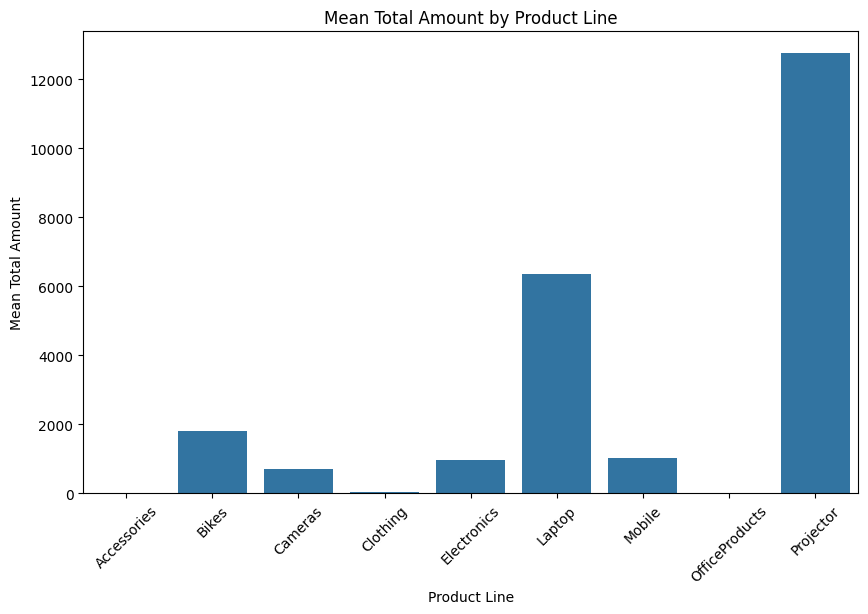

In [12]:
#bar chart
plt.figure(figsize=(10, 6))
bar_chart_data = df.groupby('product_line')['total_amount'].mean().reset_index()
sns.barplot(x='product_line', y='total_amount', data=bar_chart_data)
plt.title('Mean Total Amount by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Mean Total Amount')
plt.xticks(rotation=45)
plt.show()

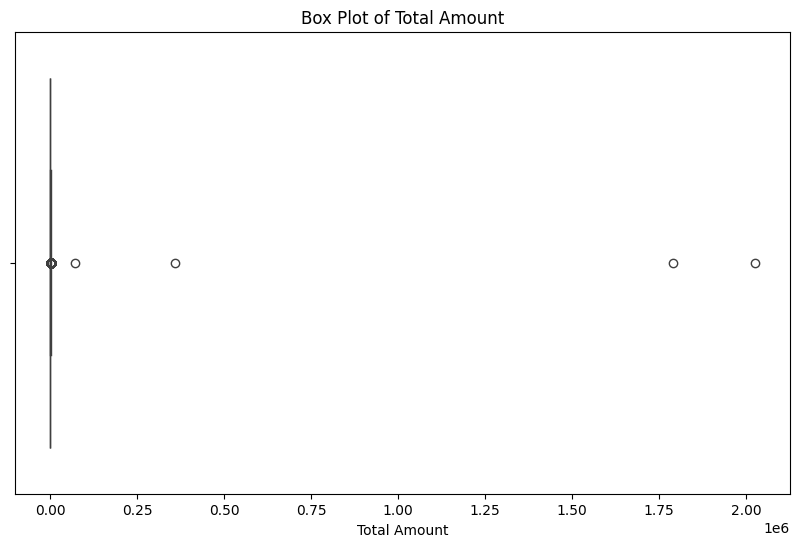

In [13]:
#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_amount'])
plt.title('Box Plot of Total Amount')
plt.xlabel('Total Amount')
plt.show()

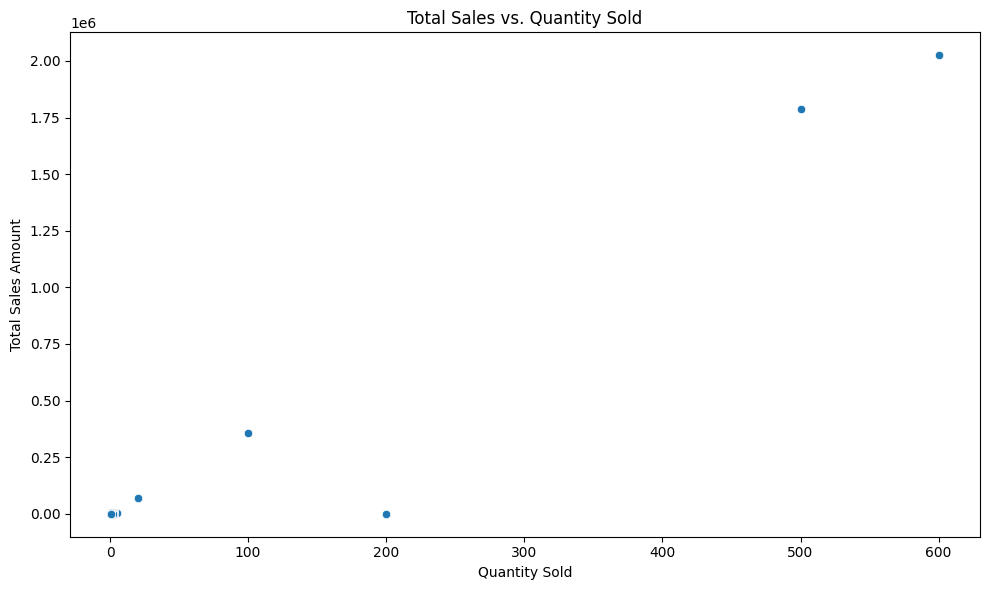

In [14]:
#scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quantity', y='total_amount', data=df)
plt.title('Total Sales vs. Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales  
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

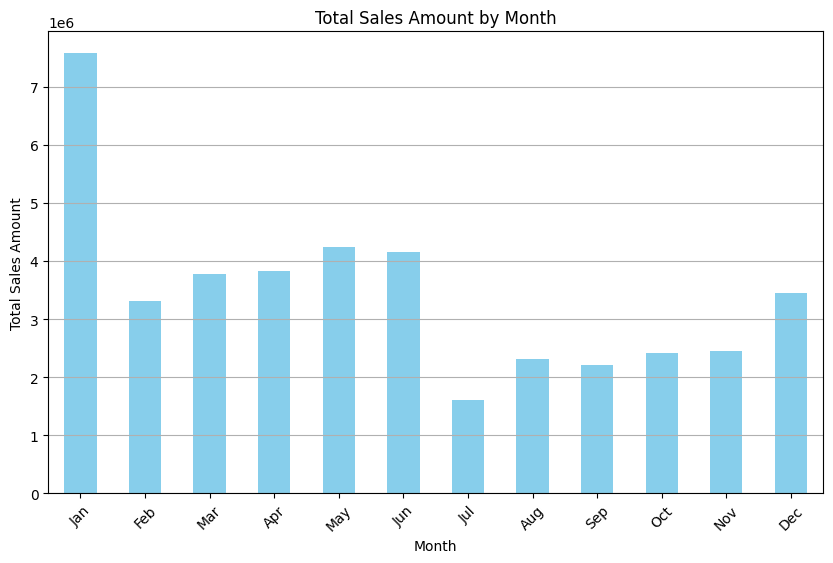

In [18]:
# Convert order_date to datetime dtype
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract month from order_date
df['month'] = df['order_date'].dt.month

# Aggregate total sales amount for each month
monthly_sales = df.groupby('month')['total_amount'].sum()

# Reorder months
monthly_sales = monthly_sales.reindex(range(1, 13), fill_value=0)

# Plotting total sales amount for each month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.show()

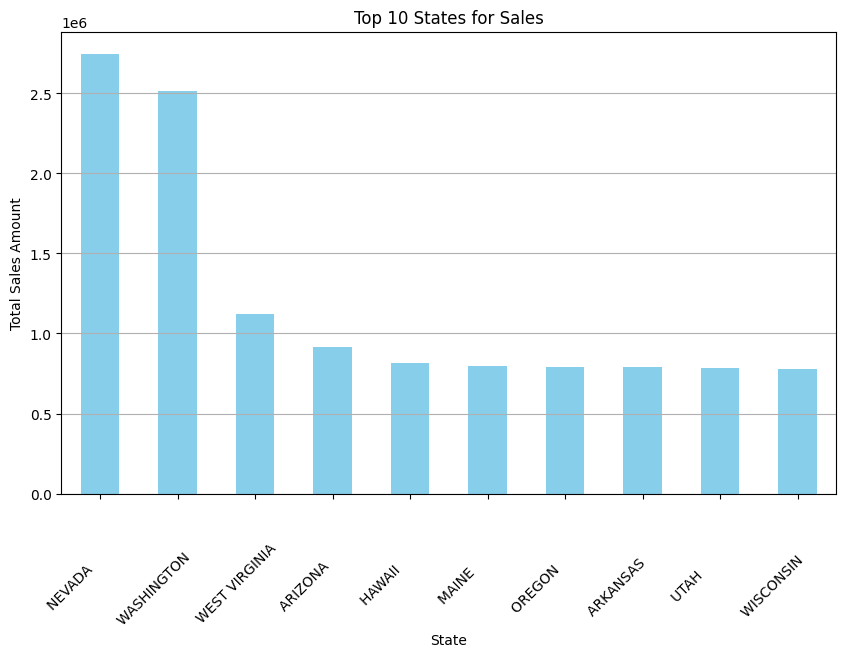

In [16]:
#sales by state
# Aggregating total sales amount by state_province
state_sales = df.groupby('state_province')['total_amount'].sum().sort_values(ascending=False)

# Plotting the top 10 states for sales
top_states = state_sales.head(10)
top_states.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 States for Sales')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

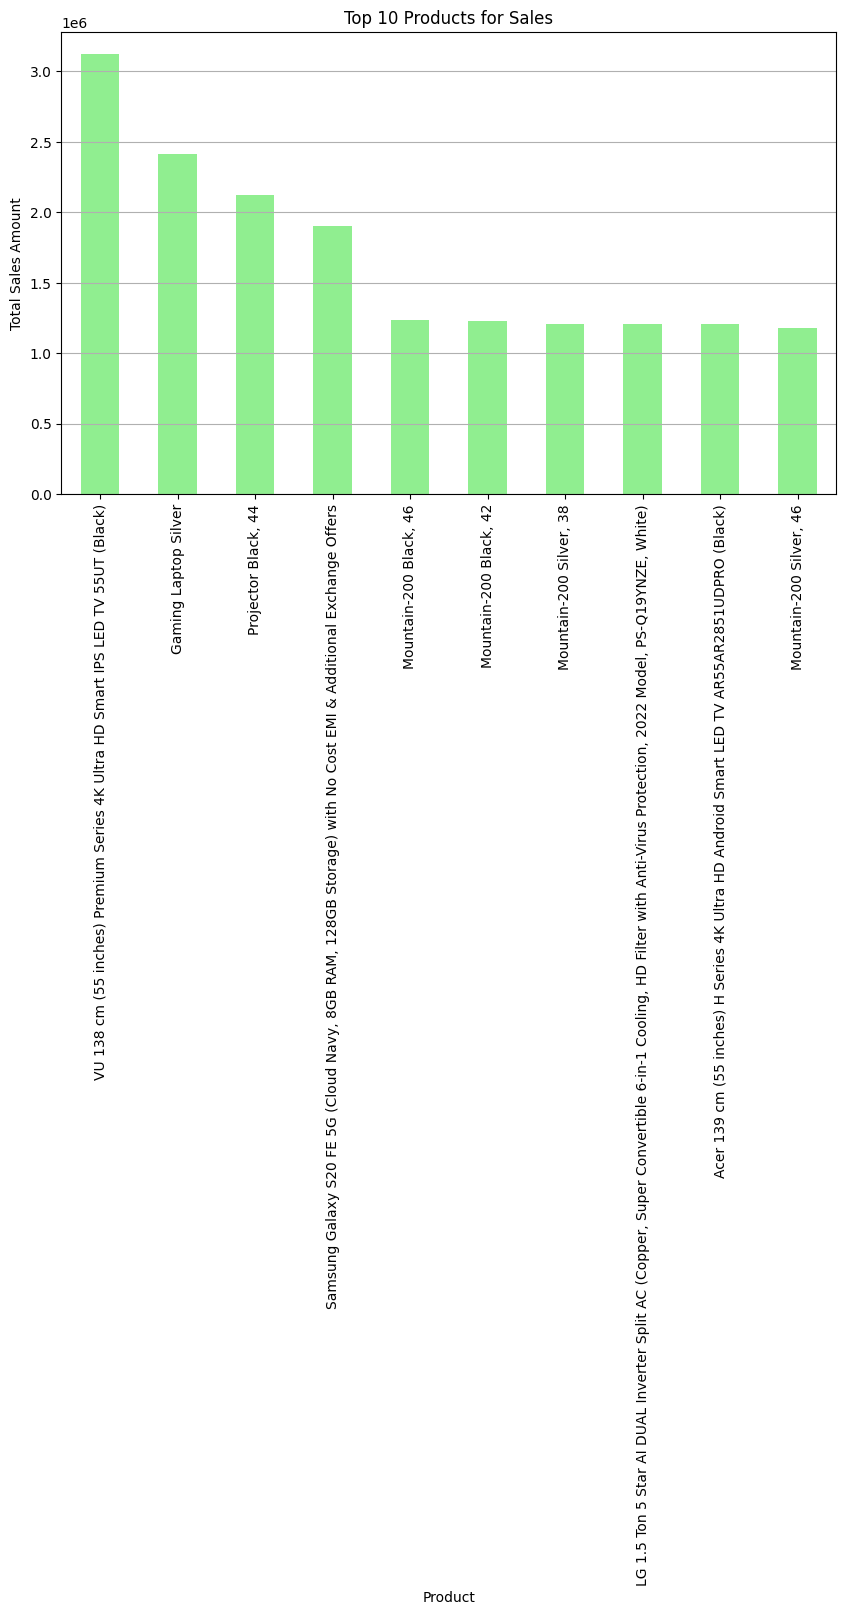

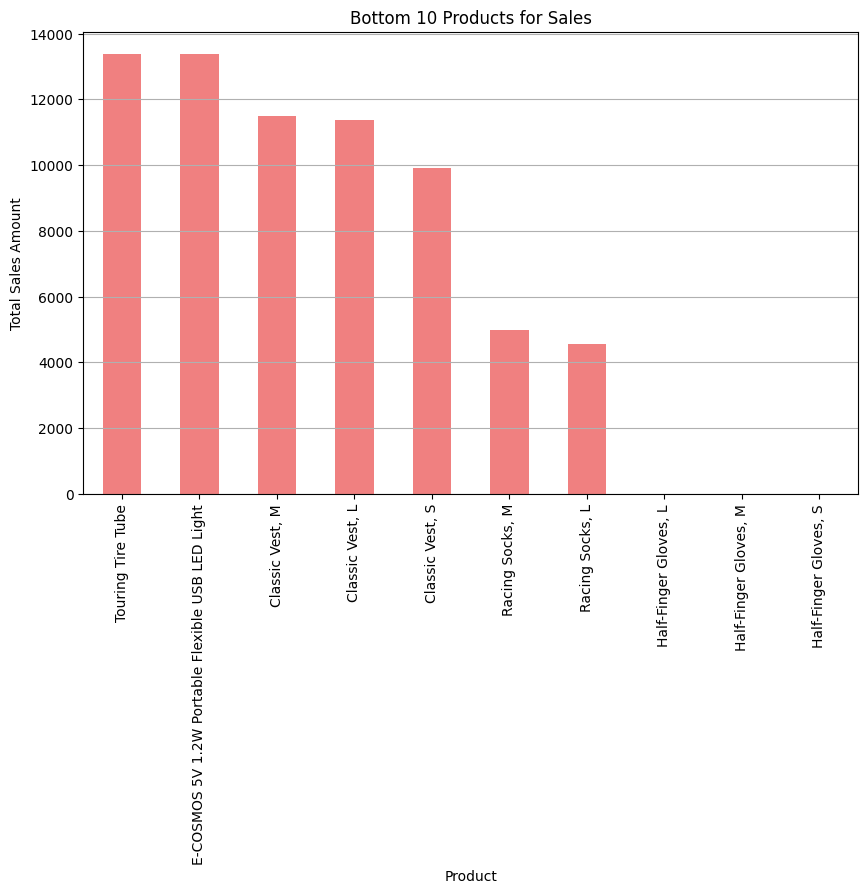

In [17]:
#sales by product
product_sales = df.groupby('product_name')['total_amount'].sum().sort_values(ascending=False)

# Plotting the top 10 products for sales
top_products = product_sales.head(10)
top_products.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Top 10 Products for Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

# Plotting the bottom 10 products for sales
bottom_products = product_sales.tail(10)
bottom_products.plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.title('Bottom 10 Products for Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
